In [1]:
# настройка ширины страницы блокнота .......................................
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# Загрузка модулей
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import time
from scipy.stats import shapiro
from sklearn import linear_model as skl_lm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Загрузка констант и глобальных настроек
SEED = 12
TRAIN_FRAC = 0.8
K_VAL = 5
ALPHA = 0.05
sns.set_style("whitegrid")
sns.set_palette("Accent")

In [4]:
# читаем таблицу из файла .csv во фрейм
fileURL = 'https://raw.githubusercontent.com/ania607/ML/main/data/Carseats.csv'
DF_raw = pd.read_csv(fileURL)
df_raw = DF_raw[["CompPrice", "Price", "ShelveLoc", "Sales"]]

In [5]:
# типы столбцов фрейма
DF_raw.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df_raw


,CompPrice,Price,ShelveLoc,Sales
0,138,120,Bad,9.50
1,111,83,Good,11.22
2,113,80,Medium,10.06
3,117,97,Medium,7.40
4,141,128,Bad,4.15
5,124,72,Bad,10.81
6,115,108,Medium,6.63
7,136,120,Good,11.85
8,132,124,Medium,6.54
9,132,124,Medium,4.69


In [7]:
df_raw.isna().sum()

CompPrice    0
Price        0
ShelveLoc    0
Sales        0
dtype: int64

In [8]:
# Создание фиктивных переменных
df_dummy = pd.get_dummies(df_raw["ShelveLoc"], drop_first = True)
df_dummy.head()

,Good,Medium
0,0,0
1,1,0
2,0,1
3,0,1
4,0,0


In [9]:
# Объединение данных
df_all = pd.concat([df_raw, df_dummy], axis=1)

In [10]:
df_all

,CompPrice,Price,ShelveLoc,Sales,Good,Medium
0,138,120,Bad,9.50,0,0
1,111,83,Good,11.22,1,0
2,113,80,Medium,10.06,0,1
3,117,97,Medium,7.40,0,1
4,141,128,Bad,4.15,0,0
5,124,72,Bad,10.81,0,0
6,115,108,Medium,6.63,0,1
7,136,120,Good,11.85,1,0
8,132,124,Medium,6.54,0,1
9,132,124,Medium,4.69,0,1


In [11]:
# Замена качественных данных количественными (для отображения на графиках)
class_le = LabelEncoder()
df_all["ShelveLoc"] = class_le.fit_transform(df_all["ShelveLoc"].values)

In [12]:
df_all

,CompPrice,Price,ShelveLoc,Sales,Good,Medium
0,138,120,0,9.50,0,0
1,111,83,1,11.22,1,0
2,113,80,2,10.06,0,1
3,117,97,2,7.40,0,1
4,141,128,0,4.15,0,0
5,124,72,0,10.81,0,0
6,115,108,2,6.63,0,1
7,136,120,1,11.85,1,0
8,132,124,2,6.54,0,1
9,132,124,2,4.69,0,1


In [13]:
# Разделение данных на тренировочные и тестовые
df_train = df_all.sample(frac = TRAIN_FRAC, random_state = SEED)
df_test = df_all.drop(df_train.index).sample(frac = 1, random_state = SEED)

In [14]:
df_train, df_test

(     CompPrice  Price  ShelveLoc  Sales  Good  Medium
 280        121    145          0   2.86     0       0
 387        142    115          2   8.67     0       1
 313        103     54          2   9.33     0       1
 1          111     83          1  11.22     1       0
 35         131     96          2  11.07     0       1
 210        125    123          0   4.36     0       0
 39         130    138          0   3.24     0       0
 52         153    129          0   7.91     0       0
 320        136    152          2   5.86     0       1
 231        132    122          2   8.09     0       1
 90         115    103          2   5.33     0       1
 159        119     70          0   9.32     0       0
 21         134    109          1  12.13     1       0
 207        111     97          0   8.19     0       0
 250        137    156          1   9.16     1       0
 364        122    131          1  10.50     1       0
 214        115    107          2   4.83     0       1
 339      

In [15]:
df_train[["CompPrice", "Price", "Sales"]].describe()

,CompPrice,Price,Sales
count,320.000000,320.000000,320.000000
mean,124.656250,115.762500,7.536812
std,15.290109,24.133767,2.840746
min,77.000000,24.000000,0.000000
25%,115.000000,100.000000,5.527500
50%,124.000000,117.000000,7.545000
75%,134.000000,131.000000,9.332500
max,175.000000,191.000000,16.270000


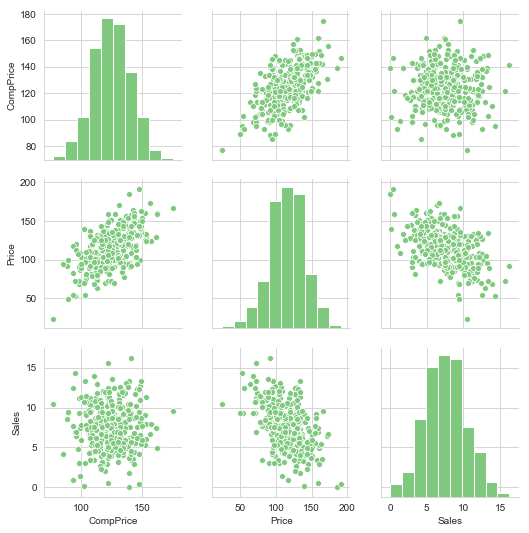

In [16]:
# Распределение и зависимость количественных данных
sns.pairplot(df_train[["CompPrice", "Price", "Sales"]])
plt.show()

C:\Anaconda\envs\env01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\envs\env01\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\envs\env01\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\envs\env01\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


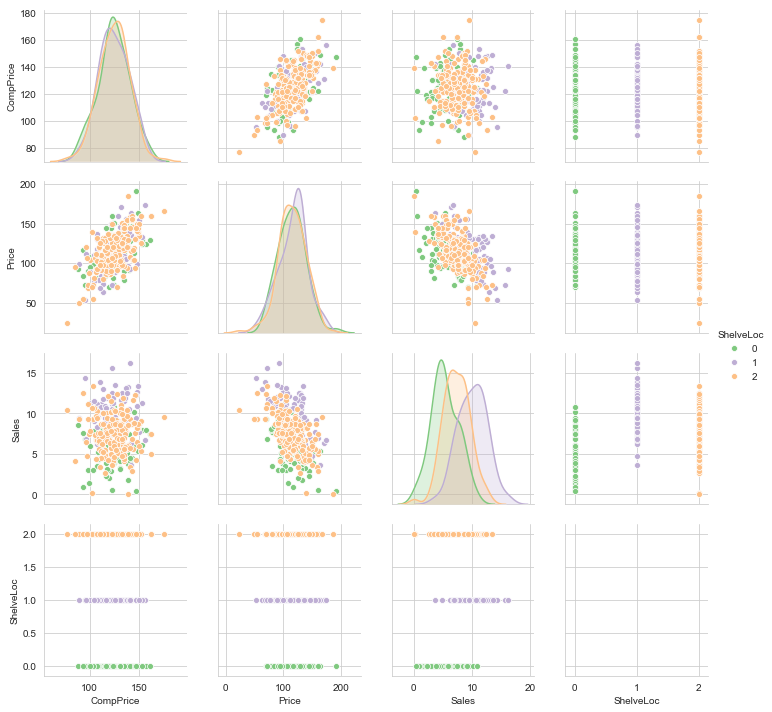

In [17]:
# Распределение и зависимость количественных данных (разделенных по качественному признаку)
sns.pairplot(df_train[["CompPrice", "Price", "Sales", "ShelveLoc"]], hue = "ShelveLoc")
plt.show()

In [18]:
# Корреляционная матрица количественных данных
corr_mat = df_train[["CompPrice", "Price", "Sales"]].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,CompPrice,Price,Sales
CompPrice,1,0.59,0.014
Price,0.59,1,-0.48
Sales,0.014,-0.48,1


In [19]:
# Корреляционная матрица количественных данных (для качественного стеллажа)
corr_mat = df_train[df_train["Good"] == 1][["CompPrice", "Price", "Sales"]].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,CompPrice,Price,Sales
CompPrice,1,0.5,0.0031
Price,0.5,1,-0.68
Sales,0.0031,-0.68,1


In [20]:
# Корреляционная матрица количественных данных (для нормального стеллажа)
corr_mat = df_train[df_train["Medium"] == 1][["CompPrice", "Price", "Sales"]].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,CompPrice,Price,Sales
CompPrice,1,0.65,-0.036
Price,0.65,1,-0.59
Sales,-0.036,-0.59,1


In [21]:
stat, p = shapiro(df_train["Sales"])
print("Statistics = {}, p = {}".format(stat, p))
if p > ALPHA:
  print("Распределение нормально (H0 не отклоняется)")
else:
  print("Распределение не нормально (H0 отклоняется)")

Statistics = 0.9963720440864563, p = 0.6813939213752747
Распределение нормально (H0 не отклоняется)


In [22]:
# Логарифмирование продаж
df_train["Sales_log"] = np.log(df_train["Sales"])

df_train[["Sales", "Sales_log", "CompPrice", "Price", "Medium", "Good"]].describe()

C:\Anaconda\envs\env01\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,Sales,Sales_log,CompPrice,Price,Medium,Good
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,7.536812,-inf,124.656250,115.762500,0.534375,0.231250
std,2.840746,NaN,15.290109,24.133767,0.499598,0.422292
min,0.000000,-inf,77.000000,24.000000,0.000000,0.000000
25%,5.527500,1.709735,115.000000,100.000000,0.000000,0.000000
50%,7.545000,2.020883,124.000000,117.000000,1.000000,0.000000
75%,9.332500,2.233503,134.000000,131.000000,1.000000,0.000000
max,16.270000,2.789323,175.000000,191.000000,1.000000,1.000000


In [23]:
df1 = df_train[["Sales", "CompPrice", "Price", "Medium", "Good"]].copy()

df2 = df_train[["Sales", "CompPrice", "Price", "Medium", "Good"]].copy()
df2["Price_Good"] = df2["Price"] * df2["Good"]
df2 = df2.drop(["Price"], axis=1)

df3 = df_train[["Sales", "CompPrice", "Price", "Medium", "Good"]].copy()
df3["CompPrice_Medium"] = df3["CompPrice"] * df3["Medium"]
df3 = df3.drop(["CompPrice"], axis=1)

df4 = df_train[["Sales", "CompPrice", "Price", "Medium", "Good"]].copy()
df4["Price_Good"] = df4["Price"] * df4["Good"]
df4["CompPrice_Medium"] = df4["CompPrice"] * df4["Medium"]
df4 = df4.drop(["CompPrice", "Price"], axis=1)

In [24]:
df4

,Sales,Medium,Good,Price_Good,CompPrice_Medium
280,2.86,0,0,0,0
387,8.67,1,0,0,142
313,9.33,1,0,0,103
1,11.22,0,1,83,0
35,11.07,1,0,0,131
210,4.36,0,0,0,0
39,3.24,0,0,0,0
52,7.91,0,0,0,0
320,5.86,1,0,0,136
231,8.09,1,0,0,132


In [27]:
from sklearn.model_selection import LeaveOneOut
import time
lm = skl_lm.LinearRegression()
# LeaveOneOut CV
loo = LeaveOneOut()
# модели для y
scores = list()
# таймер
tic = time.perf_counter()
for df in [df1, df2, df3, df4] :
    loo.get_n_splits(df)
    X = df.drop(['Sales'], axis=1)
    y = df.Sales
    score = cross_val_score(lm, X, y, cv=loo,
    scoring='neg_mean_squared_error').mean()
    scores.append(score)
# таймер
toc = time.perf_counter()
print("Расчёты методом LOOCV заняли {:.2f} секунд".format(toc - tic))



Расчёты методом LOOCV заняли 2.58 секунд


In [28]:
scores

[-2.453856084167232,
 -4.875401330218485,
 -3.100853584176243,
 -4.927559469992737]

In [29]:
# Выбор наилучшей модели
fits = ["model1", "model2", "model3", "model4"]
print("Наименьшая ошибка методом LOOSV у модели",
      fits[scores.index(max(scores))],
      ":\nMSE_kf5 =", np.around(-max(scores), 0))

Наименьшая ошибка методом LOOSV у модели model1 :
MSE_kf5 = 2.0


In [31]:
# Проверка качества модели на тестовых данных
x = df1.drop(["Sales"], axis=1)
y = df1[["Sales"]].values.reshape(-1, 1)
model1 = lm.fit(x, y)

y = df_test[["Sales"]].values.reshape(-1, 1)
x = df_test[["CompPrice", "Price", "Medium", "Good"]]
y_pred = model1.predict(x)

MSE = sum((y - y_pred.reshape(-1, 1)) ** 2) / len(y)
print("MSE модели model1 на тестовых наблюдениях = {:.2f}".format(MSE[0]))

MSE модели model1 на тестовых наблюдениях = 2.56


In [32]:
# Оценка средней ошибки модели в процентах
print("Ошибка модели на отложенных наблюдениях составила ",
      np.around(np.sqrt(MSE) / np.mean(y) * 100, 1)[0],
      "% от среднего значения Y",
      sep = "")

Ошибка модели на отложенных наблюдениях составила 21.8% от среднего значения Y


In [33]:
# Построение финальной модели на всех данных
x = df_all.drop(["Sales", "ShelveLoc"], axis=1)
y = df_all[["Sales"]].values.reshape(-1, 1)
model1 = lm.fit(x, y)

print("модель model1:\n",
      "константа ", np.around(model1.intercept_, 3),
      "\n объясняющие ", list(x.columns.values),
      "\n коэффициенты ", np.around(model1.coef_, 3))

модель model1:
 константа  [4.755] 
 объясняющие  ['CompPrice', 'Price', 'Good', 'Medium'] 
 коэффициенты  [[ 0.09  -0.091  4.862  1.812]]
